In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from datetime import datetime
from scipy import log,exp,sqrt,stats

In [2]:
# Importing pickle file
data = np.load('latest_coin_data.pkl')

# Dataframes for Bitcoin, Litecoin, Ethereum 

In [3]:
#Putting bitcoin, litecoin, and ethereum data in a dataframe
bigthree=pd.DataFrame(data.loc[["bitcoin","litecoin","ethereum"]])

# Initialize a close_price list for big3 dataframe
marketcap_bigthree_list = list()
# Making a list of all close_prices
for date in bigthree.index:
    for column in bigthree.columns:
        marketcap_bigthree_list.append(bigthree[column][date]['market_cap'])

# Splitting list into 4 lists (one per coin)
marketcap_bigthree_list = [marketcap_bigthree_list[i:i+916] for i  in range(0, len(marketcap_bigthree_list), 916)]   

In [4]:
#Making marketcap dataframe for big three
marketcap_bigthree = pd.DataFrame(data = marketcap_bigthree_list)
marketcap_bigthree.index=bigthree.index
marketcap_bigthree.columns=bigthree.columns

# Reordering column index
marketcap_bigthree = marketcap_bigthree[marketcap_bigthree.columns[::-1]]

# original date index
marketcap_bigthree_index = marketcap_bigthree.columns[::7]

# Index to Datetime index
marketcap_bigthree.columns = pd.to_datetime(marketcap_bigthree.columns)

# Weekly Median marketcap
marketcap_bigthree = marketcap_bigthree.resample('W', axis = 1).median()

# Deleting first day
del marketcap_bigthree['2016-01-03 00:00:00']

In [5]:
#Making close_price list for big 3
close_list_bigthree = list()

# Making a list of all close_prices
for date in bigthree.index:
    for column in bigthree.columns:
        close_list_bigthree.append(bigthree[column][date]['close_price'])

# Splitting list into 4lists (one per coin)
close_list_bigthree = [close_list_bigthree[i:i+916] for i  in range(0, len(close_list_bigthree), 916)]

# Making a Dataframe
close_bigthree = pd.DataFrame(data = close_list_bigthree)
close_bigthree.index = bigthree.index
close_bigthree.columns = bigthree.columns

# Reordering columns
close_bigthree_index = close_bigthree[close_bigthree.columns[::-1]]

# Index to Datetime index
close_bigthree.columns = pd.to_datetime(close_bigthree.columns)

# Weekly Median close_df
close_bigthree = close_bigthree.resample('W', axis = 1).median()

# Deleting first day
del close_bigthree['2016-01-03 00:00:00']


# Dataframes for Bitcoin-Cash

In [6]:
#Putting bitcoincash data into a dataframe
bitcoincash_nan=pd.DataFrame(data.loc[["bitcoin-cash"]])
#dropping bitcoincash nan values (First day=Aug 2, 2017), 336 datapoints
bitcoincash=pd.DataFrame(bitcoincash_nan.iloc[0:2,1:337])

# Initialize a close_price list for bitcoincash dataframe
marketcap_bitcoincash_list = list()
# Making a list of all close_prices
for date in bitcoincash.index:
    for column in  bitcoincash.columns:
        marketcap_bitcoincash_list.append(bitcoincash[column][date]['market_cap'])
        
marketcap_bitcoincash_list = [marketcap_bitcoincash_list[i:i+916] for i  in range(0, len(marketcap_bitcoincash_list), 916)]     

In [7]:
#Making marketcap dataframe for bitcoin cash
marketcap_bitcoincash = pd.DataFrame(data = marketcap_bitcoincash_list)
marketcap_bitcoincash.index=bitcoincash.index
marketcap_bitcoincash.columns=bitcoincash.columns
marketcap_bitcoincash.fillna(0)

# Reordering column index
marketcap_bitcoincash = marketcap_bitcoincash[marketcap_bitcoincash.columns[::-1]]

# original date index
marketcap_bitcoincash_index = marketcap_bitcoincash.columns[::7]

# Index to Datetime index
marketcap_bitcoincash.columns = pd.to_datetime(marketcap_bitcoincash.columns)

# Weekly Median marketcap 
marketcap_bitcoincash = marketcap_bitcoincash.resample('W', axis = 1).median()

# Deleting first day (aug 02 2017)
del marketcap_bitcoincash['2017-08-06 00:00:00']

In [8]:
#Making close_price list for bitcoin-cash
close_list_bitcoincash = list()

# Making a list of all close_prices
for date in bitcoincash.index:
    for column in bitcoincash.columns:
        close_list_bitcoincash.append(bitcoincash[column][date]['close_price'])

# Splitting list into 4lists (one per coin)
close_list_bitcoincash = [close_list_bitcoincash[i:i+916] for i  in range(0, len(close_list_bitcoincash), 916)]

# Making a Dataframe
close_bitcoincash = pd.DataFrame(data = close_list_bitcoincash)
close_bitcoincash.index =bitcoincash.index
close_bitcoincash.columns =bitcoincash.columns

# Reordering columns
close_bitcoincash_index = close_bitcoincash[close_bitcoincash.columns[::-1]]

# Index to Datetime index
close_bitcoincash.columns = pd.to_datetime(close_bitcoincash.columns)

# Weekly Median close_df
close_bitcoincash = close_bitcoincash.resample('W', axis = 1).median()

# Deleting first day
del close_bitcoincash['2017-08-06 00:00:00']


# Combined and Weekly Dataframes

In [9]:
#combining big3 and bitcoincash marketcap dataframes
marketcap_all = pd.concat([marketcap_bigthree, marketcap_bitcoincash], axis=0)
marketcap_all.fillna(0,inplace=True)
marketcap_all.head()

# Reverting Index
marketcap_all.columns = marketcap_bigthree_index
marketcap_all.head()

,"Jan 01, 2016","Jan 08, 2016","Jan 15, 2016","Jan 22, 2016","Jan 29, 2016","Feb 05, 2016","Feb 12, 2016","Feb 19, 2016","Feb 26, 2016","Mar 04, 2016",...,"Apr 27, 2018","May 04, 2018","May 11, 2018","May 18, 2018","May 25, 2018","Jun 01, 2018","Jun 08, 2018","Jun 15, 2018","Jun 22, 2018","Jun 29, 2018"
bitcoin,6.515380e+09,6.519110e+09,5.843510e+09,5.929520e+09,5.679530e+09,5.771040e+09,6.341430e+09,6.600310e+09,6.474150e+09,6.337370e+09,...,1.603020e+11,1.570130e+11,1.426080e+11,1.294700e+11,1.274540e+11,1.303860e+11,1.127400e+11,1.152690e+11,1.056250e+11,1.122140e+11
litecoin,1.533190e+08,1.528530e+08,1.361220e+08,1.388860e+08,1.368200e+08,1.374610e+08,1.445430e+08,1.525610e+08,1.504930e+08,1.469860e+08,...,8.651810e+09,8.872740e+09,7.894060e+09,6.946970e+09,6.701530e+09,6.900220e+09,5.740970e+09,5.533550e+09,4.590840e+09,4.876070e+09
ethereum,7.269290e+07,8.653000e+07,1.150020e+08,1.872890e+08,1.941260e+08,3.459640e+08,3.382220e+08,4.611690e+08,6.539590e+08,8.715110e+08,...,6.837640e+10,7.475870e+10,7.042620e+10,6.000040e+10,5.713670e+10,6.050450e+10,5.000580e+10,5.198570e+10,4.438190e+10,4.663260e+10
bitcoin-cash,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.496780e+10,2.752240e+10,2.210360e+10,1.839310e+10,1.708410e+10,1.948990e+10,1.506520e+10,1.504630e+10,1.234070e+10,1.303465e+10


In [10]:
#combining big3 and bitcoincash close_price dataframes
close_all = pd.concat([marketcap_bigthree, marketcap_bitcoincash], axis=0)
close_all.fillna(0,inplace=True)
close_all.head()

# Reverting Index
close_all.columns = marketcap_bigthree_index
close_all.head()

,"Jan 01, 2016","Jan 08, 2016","Jan 15, 2016","Jan 22, 2016","Jan 29, 2016","Feb 05, 2016","Feb 12, 2016","Feb 19, 2016","Feb 26, 2016","Mar 04, 2016",...,"Apr 27, 2018","May 04, 2018","May 11, 2018","May 18, 2018","May 25, 2018","Jun 01, 2018","Jun 08, 2018","Jun 15, 2018","Jun 22, 2018","Jun 29, 2018"
bitcoin,6.515380e+09,6.519110e+09,5.843510e+09,5.929520e+09,5.679530e+09,5.771040e+09,6.341430e+09,6.600310e+09,6.474150e+09,6.337370e+09,...,1.603020e+11,1.570130e+11,1.426080e+11,1.294700e+11,1.274540e+11,1.303860e+11,1.127400e+11,1.152690e+11,1.056250e+11,1.122140e+11
litecoin,1.533190e+08,1.528530e+08,1.361220e+08,1.388860e+08,1.368200e+08,1.374610e+08,1.445430e+08,1.525610e+08,1.504930e+08,1.469860e+08,...,8.651810e+09,8.872740e+09,7.894060e+09,6.946970e+09,6.701530e+09,6.900220e+09,5.740970e+09,5.533550e+09,4.590840e+09,4.876070e+09
ethereum,7.269290e+07,8.653000e+07,1.150020e+08,1.872890e+08,1.941260e+08,3.459640e+08,3.382220e+08,4.611690e+08,6.539590e+08,8.715110e+08,...,6.837640e+10,7.475870e+10,7.042620e+10,6.000040e+10,5.713670e+10,6.050450e+10,5.000580e+10,5.198570e+10,4.438190e+10,4.663260e+10
bitcoin-cash,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.496780e+10,2.752240e+10,2.210360e+10,1.839310e+10,1.708410e+10,1.948990e+10,1.506520e+10,1.504630e+10,1.234070e+10,1.303465e+10


In [11]:
# Making weekly marketcap DataFrames
wmc = {}
for week in marketcap_all:
    wmc[week] = pd.DataFrame(marketcap_all[week].sort_values(ascending=False))
    wmc[week].columns = ['market_cap']

# Percent Changes and Proportions

In [12]:
#Calculating pct_change in market cap per week
weekly_marketcap = marketcap_all.copy().T
marketcap_pct = weekly_marketcap.pct_change(1).T
marketcap_pct.fillna(0,inplace=True)

In [13]:
#Calculating pct_change in close price per week
weekly_close = close_all.copy().T
close_pct = weekly_close.pct_change(1).T
close_pct.fillna(0,inplace=True)


In [14]:
# Calculating Proportion of market caps
for week in marketcap_all.columns:
    wmc[week]['Proportion'] = (wmc[week]['market_cap'])/(wmc[week]['market_cap'].sum())
    
print(wmc['Jan 08, 2016'])
print('total:                  ', wmc['Jan 08, 2016']['Proportion'].sum())

                market_cap  Proportion
bitcoin       6.519110e+09    0.964580
litecoin      1.528530e+08    0.022616
ethereum      8.653000e+07    0.012803
bitcoin-cash  0.000000e+00    0.000000
total:                   1.0


In [15]:
#Corresponding market cap & pct_change columns
coin_labels = list()
last_week_list = marketcap_all.columns[1::]

for week in wmc:
    coin_labels.append(wmc[week].index)      

# Adding close price columns
for (week, coin, last_week) in zip(close_all.columns, coin_labels, last_week_list):
    wmc[week]['market_cap'] = marketcap_all[week][coin]
    wmc[week]['close_price']= close_all[week][coin]
    wmc[week]['pct_change'] = marketcap_pct[week][coin]
    

In [16]:
print('Jan 08, 2016')
wmc['Jan 08, 2016']

Jan 08, 2016


,market_cap,Proportion,close_price,pct_change
bitcoin,6.519110e+09,0.964580,6.519110e+09,0.000572
litecoin,1.528530e+08,0.022616,1.528530e+08,-0.003039
ethereum,8.653000e+07,0.012803,8.653000e+07,0.190350
bitcoin-cash,0.000000e+00,0.000000,0.000000e+00,0.000000


In [17]:
del wmc['Jan 01, 2016']
del marketcap_all['Jan 01, 2016']
del marketcap_pct['Jan 01, 2016']
del close_all['Jan 01, 2016']
del close_pct['Jan 01, 2016']
del wmc['Aug 04, 2017']
del marketcap_all['Aug 04, 2017']
del marketcap_pct['Aug 04, 2017']
del close_all['Aug 04, 2017']
del close_pct['Aug 04, 2017']

# Final Dataframe and Plots

In [18]:
#making dataframe for all weeks
coin_labels = list()
last_week_list = close_all.columns[1::]
simple_list = list()
log_list = list()

for week in wmc:
    coin_labels.append(wmc[week].index)  

for (week, coin, last_week) in zip(marketcap_all.columns, coin_labels, last_week_list):
    wmc[week]['close_price'] = close_all[week][coin]
    wmc[week]['prior_close'] = close_all[last_week][coin]
    wmc[week]['pct_change_close'] = close_pct[week][coin]
    wmc[week]['simple_returns'] = wmc[week]['Proportion']*wmc[week]['pct_change_close']
    wmc[week]['logs'] = np.log((wmc[week]['close_price'])/(wmc[week]['prior_close']))
    wmc[week]['prop_logs'] = wmc[week]['Proportion']*wmc[week]['logs']
    simple_list.append(sum(wmc[week]['simple_returns']))
    log_list.append(sum(wmc[week]['prop_logs']))

wmc['Jan 08, 2016']

/home/shreya/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


,market_cap,Proportion,close_price,pct_change,prior_close,pct_change_close,simple_returns,logs,prop_logs
bitcoin,6.519110e+09,0.964580,6.519110e+09,0.000572,5.843510e+09,0.000572,0.000552,0.109406,0.105531
litecoin,1.528530e+08,0.022616,1.528530e+08,-0.003039,1.361220e+08,-0.003039,-0.000069,0.115925,0.002622
ethereum,8.653000e+07,0.012803,8.653000e+07,0.190350,1.150020e+08,0.190350,0.002437,-0.284458,-0.003642
bitcoin-cash,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,NaN,NaN


In [19]:
#Making Returns Dataframe
Weekly_Returns = pd.DataFrame(data = simple_list, index = close_all.columns[1:], 
                       columns = ['weekly_returns'])
Weekly_Returns['log_returns'] = log_list
Weekly_Returns['cum_returns'] = (1 + Weekly_Returns['weekly_returns']).cumprod()
Weekly_Returns['cum_log_returns'] = Weekly_Returns['log_returns'].cumsum()
Weekly_Returns.head()

,weekly_returns,log_returns,cum_returns,cum_log_returns
"Jan 15, 2016",0.002921,NaN,1.002921,NaN
"Jan 22, 2016",-0.095600,NaN,0.907042,NaN
"Jan 29, 2016",0.033221,NaN,0.937175,NaN
"Feb 05, 2016",-0.038998,NaN,0.900626,NaN
"Feb 12, 2016",0.058235,NaN,0.953074,NaN


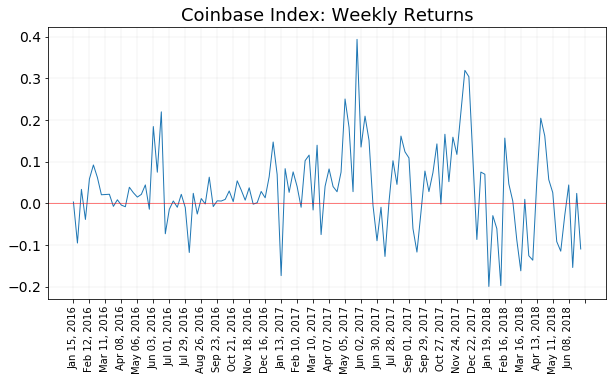

In [24]:
#plotting weekly returns
plt.plot(Weekly_Returns['weekly_returns'], linewidth = 1)
plt.plot()
plt.axhline(0, color='red', linewidth = 0.5)
plt.title('Coinbase Index: Weekly Returns', fontsize = 18)
plt.rcParams['figure.figsize'] = (10,5)
plt.grid(color='black', linestyle='-', linewidth=0.05)
plt.xticks(np.arange(0,131,step=4), rotation=90, fontsize = 10)
plt.yticks(fontsize = 14)
plt.show()

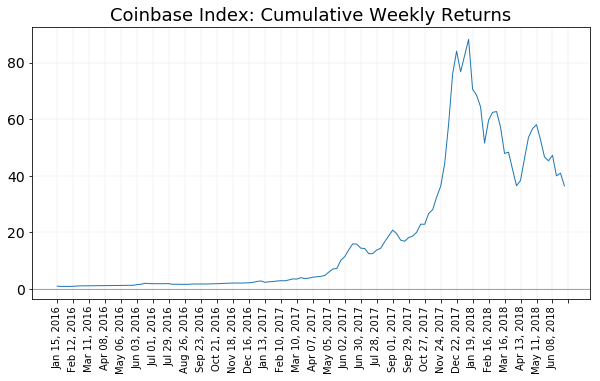

In [21]:
#plotting cumulative returns
plt.plot(Weekly_Returns['cum_returns'], linewidth = 1)
plt.plot()
plt.axhline(0, color='red', linewidth = 0.5)
plt.title('Coinbase Index: Cumulative Weekly Returns', fontsize = 18)
plt.rcParams['figure.figsize'] = (10,5)
plt.grid(color='black', linestyle='-', linewidth=0.05)
plt.xticks(np.arange(0,131,step=4), rotation=90, fontsize = 10)
plt.yticks(fontsize = 14)
plt.show()

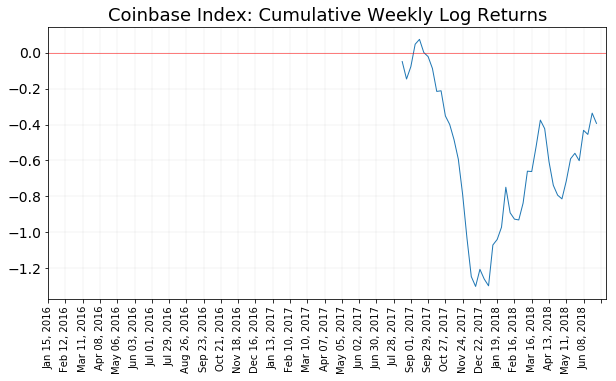

In [22]:
#plotting cumulative log returns
plt.plot(Weekly_Returns['cum_log_returns'], linewidth = 1)
plt.plot()
plt.axhline(0, color='red', linewidth = 0.5)
plt.title('Coinbase Index: Cumulative Weekly Log Returns', fontsize = 18)
plt.rcParams['figure.figsize'] = (10,5)
plt.grid(color='black', linestyle='-', linewidth=0.05)
plt.xticks(np.arange(0,131,step=4), rotation=90, fontsize = 10)
plt.yticks(fontsize = 14)
plt.show()

In [23]:
Coinbase_Returns=Weekly_Returns.drop(Weekly_Returns.index[0:25])
Coinbase_Returns.to_csv('Coinbase_Returns.csv')
Coinbase_Returns.tail()


,weekly_returns,log_returns,cum_returns,cum_log_returns
"Jun 01, 2018",-0.029582,-0.041356,45.302930,-0.601492
"Jun 08, 2018",0.043791,0.169269,47.286788,-0.432222
"Jun 15, 2018",-0.154286,-0.022950,39.991099,-0.455173
"Jun 22, 2018",0.023559,0.118766,40.933255,-0.336407
"Jun 29, 2018",-0.109801,-0.057141,36.438759,-0.393547
